<h1 align="center"><font size="5"> Credit Card Default (Logistic Regression)</font></h1>

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Objective :- 

(1) Identify the key drivers that determine the likelihood of credit card default.

(2) Predict the likelihood of credit card default for customers of the Bank.

## Importing packages and loading data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
data=pd.read_csv("UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploratory Data Analysis

In [5]:
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True) # drop column "ID"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

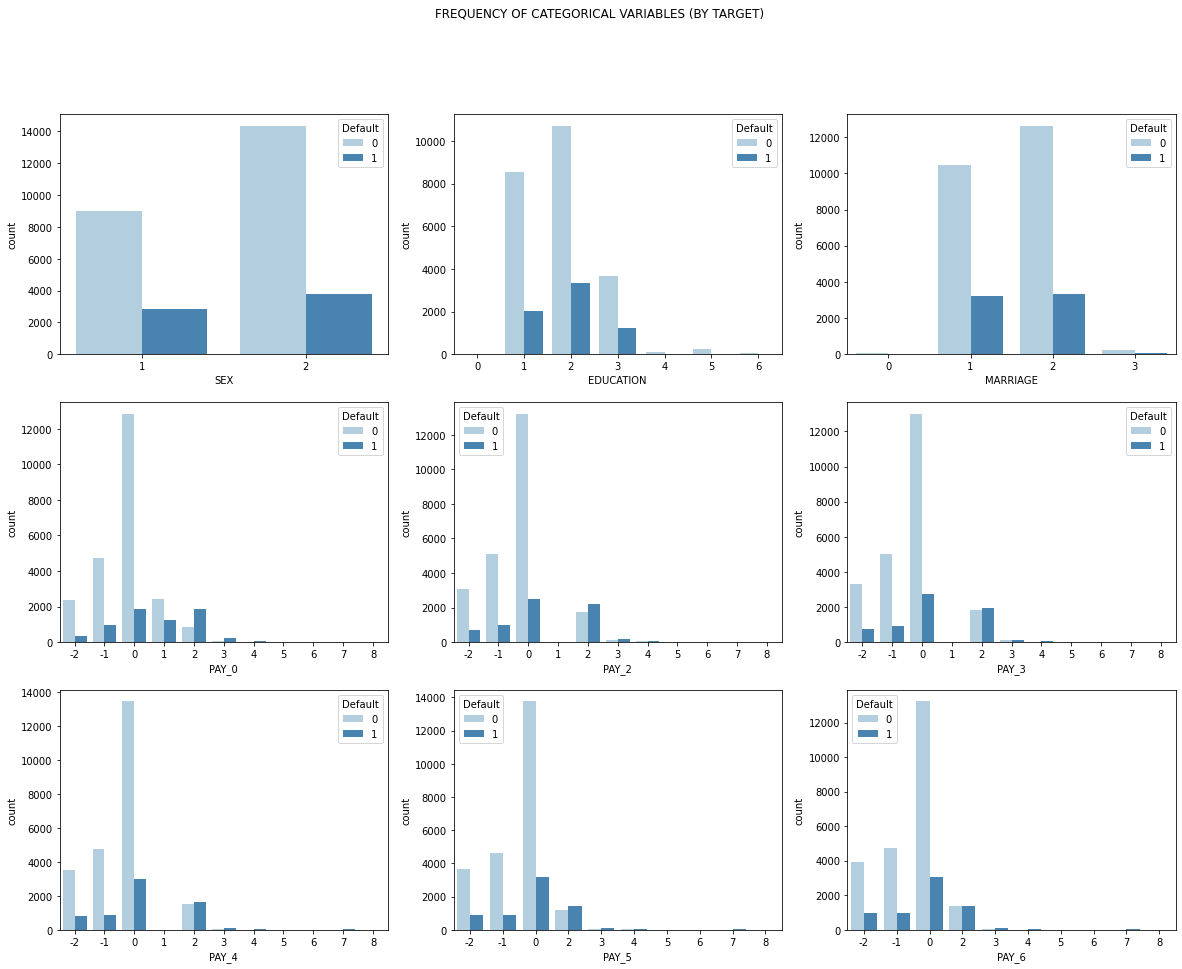

In [6]:
# Creating a new dataframe with categorical variables
subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2])

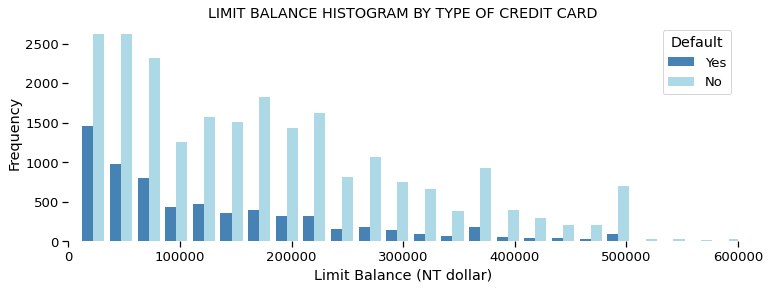

In [7]:
x1 = list(data[data['Default'] == 1]['LIMIT_BAL'])
x2 = list(data[data['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD')
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Feature Engineering

The data has been already encoded and cleaned. However, some categorical data have repeated categories. For instance, the variable ‘education’ has three categories with similar information:
4: others, 5: unknown, and 6: unknown

In [8]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [9]:
# The categories 4:others, 5:unknown, and 6:unknown can be grouped into a single class '4'.
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

# After grouping, the education column has the following categories:
data["EDUCATION"].unique()

array([2, 1, 3, 4], dtype=int64)

In [10]:
""""
Similarly, the column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others
but it contains a category '0' which will be joined to the category '3'.
"""""
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [11]:
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [12]:
# Separating features and target
y = data.Default     # target default=1 or non-default=0
X = data.drop('Default', axis = 1, inplace = False)

In [13]:
# Normalization

X_norm= preprocessing.StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13672015,  0.81016074,  0.21186989, -1.06879721, -1.24601985,
         1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
        -1.48604076, -0.64250107, -0.64739923, -0.66799331, -0.67249727,
        -0.66305853, -0.65272422, -0.34194162, -0.22708564, -0.29680127,
        -0.30806256, -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.21186989,  0.84913055, -1.02904717,
        -0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551, -0.65921875, -0.66674657, -0.63925429, -0.62163594,
        -0.60622927, -0.59796638, -0.34194162, -0.21358766, -0.24000461,
        -0.24422965, -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.21186989,  0.84913055, -0.16115646,
         0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738, -0.29855966, -0.49389911, -0.48240819, -0.44973025,
        -0.41718767, -0.39162956, -0.25029158, -0.19188673, -0.24000461,
        -0.24422965, -0.2486

In [14]:
X_df=pd.DataFrame(X_norm, index=X.index, columns=X.columns)
X_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.211870,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.211870,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.211870,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.211870,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.211870,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.555086,-1.068797,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,...,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,-1.234323,1.555086,0.849131,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,...,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,-1.234323,0.211870,0.849131,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,...,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,-1.234323,1.555086,-1.068797,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,...,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [15]:
new_data=pd.concat([X_df,y],axis=1,join="inner")
new_data.shape

(30000, 24)

In [16]:
new_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [17]:
new_data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

## Data Imbalance Handling

### (1) SMOTE - Over Sampling

 Oversampling the data, increasing no. of observations to make the data balance using SMOTE

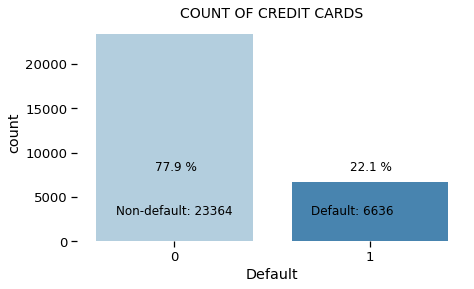

In [18]:
# The frequency of defaults
yes = data.Default.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=data, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False)

In [19]:
import imblearn
print(imblearn.__version__)


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


0.9.1


In [20]:
#smote data
sm = SMOTE(random_state = 42)
smote_data,y1 = sm.fit_resample(new_data,new_data["Default"])

In [21]:
smote_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,-1.136720,0.810161,0.211870,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,0.810161,0.211870,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.810161,0.211870,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,0.810161,0.211870,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,-1.234323,0.211870,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,2.512788,0.810161,0.211870,-1.068797,1.126111,0.712124,-0.723570,-0.696663,-0.666599,-1.339053,...,-0.652454,-0.658723,-0.655356,-0.259087,-0.058517,-0.155963,-0.281234,-0.314136,-0.221918,1
46724,-1.050760,-1.234323,-1.131346,0.849131,-1.341998,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.430429,-0.432545,-0.422016,-0.262626,-0.176111,-0.253358,-0.270701,-0.281757,-0.265359,1
46725,0.478274,-1.234323,-1.131346,0.849131,-0.274653,1.430405,1.782348,1.809921,1.899436,1.999879,...,2.206995,2.377896,2.545521,0.356145,-0.256990,0.857130,-0.044091,0.251529,0.057009,1
46726,0.379905,0.810161,0.211870,0.849131,-0.449864,-0.874991,-0.723570,-0.696663,-0.666599,-0.647565,...,-0.643598,-0.640630,-0.646791,-0.245453,-0.200789,-0.191093,-0.220828,-0.290906,-0.211646,1


In [22]:
smote_data.value_counts("Default")

Default
0    23364
1    23364
dtype: int64

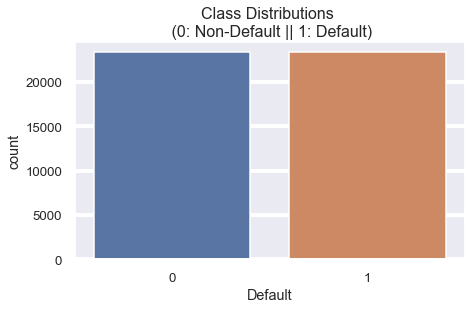

In [23]:
# Checking through graph - labels distributions

sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (7,4))
sns.countplot(smote_data['Default'])
plt.title('Class Distributions \n (0: Non-Default || 1: Default)', fontsize=16)
plt.show()

### (2)  UnderSampling

Under sampling the data reducing number of observation to make data balanced.

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
# undersampling whole data
undersample = RandomUnderSampler(sampling_strategy='majority')
undersampled_data,y2 = undersample.fit_resample(new_data,new_data['Default'])

In [26]:
undersampled_data.value_counts('Default')

Default
0    6636
1    6636
dtype: int64

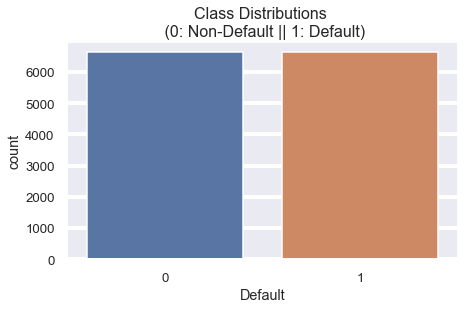

In [27]:
# Checking through graph - labels distributions

sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (7,4))
sns.countplot(undersampled_data['Default'])
plt.title('Class Distributions \n (0: Non-Default || 1: Default)', fontsize=16)
plt.show()

## Outliers (Smote Data)

In [28]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to default cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset


In [29]:
for col in smote_data:
    smote_df = outliers_removal(smote_data[col],str(col),smote_data)

Quartile 25: -0.9054982522888293 | Quartile 75: 0.4014213111218577
iqr: 1.306919563410687
Cut Off: 1.9603793451160305
LIMIT_BAL Lower: -2.86587759740486
LIMIT_BAL Upper: 2.361800656237888
LIMIT_BAL outliers for close to default cases: 1247
-----------------------------------------------------------------
Quartile 25: -1.234322957273864 | Quartile 75: 0.8101607396241002
iqr: 2.0444836968979643
Cut Off: 3.066725545346946
SEX Lower: -4.3010485026208105
SEX Upper: 3.8768862849710466
SEX outliers for close to default cases: 0
-----------------------------------------------------------------
Quartile 25: -1.1313458289814797 | Quartile 75: 0.21186989325393224
iqr: 1.343215722235412
Cut Off: 2.014823583353118
EDUCATION Lower: -3.146169412334598
EDUCATION Upper: 2.2266934766070503
EDUCATION outliers for close to default cases: 516
-----------------------------------------------------------------
Quartile 25: -1.0687972125406418 | Quartile 75: 0.8491305525161388
iqr: 1.9179277650567805
Cut Off: 

In [30]:
smote_df.shape

(46728, 24)

No outliers after scaling and balancing in SMOTE data.

## Outliers (UnderSampled Data)

In [31]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to Drefault cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in undersampled_data:
    undersampled_df = outliers_removal(undersampled_data[col],str(col),undersampled_data)
    

Quartile 25: -0.9054982522888293 | Quartile 75: 0.4047591454224674
iqr: 1.3102573977112968
Cut Off: 1.9653860965669452
LIMIT_BAL Lower: -2.8708843488557747
LIMIT_BAL Upper: 2.3701452419894125
LIMIT_BAL outliers for close to Drefault cases: 376
-----------------------------------------------------------------
Quartile 25: -1.234322957273864 | Quartile 75: 0.8101607396241002
iqr: 2.0444836968979643
Cut Off: 3.066725545346946
SEX Lower: -4.3010485026208105
SEX Upper: 3.8768862849710466
SEX outliers for close to Drefault cases: 0
-----------------------------------------------------------------
Quartile 25: -1.1313458289814797 | Quartile 75: 0.21186989325393224
iqr: 1.343215722235412
Cut Off: 2.014823583353118
EDUCATION Lower: -3.146169412334598
EDUCATION Upper: 2.2266934766070503
EDUCATION outliers for close to Drefault cases: 156
-----------------------------------------------------------------
Quartile 25: -1.0687972125406418 | Quartile 75: 0.8491305525161388
iqr: 1.9179277650567805
Cut

In [32]:
undersampled_df.shape

(13272, 24)

No outliers in under sampled data after scaling and balancing

In [33]:
y.shape

(30000,)

# Multicollinearity

### Calculating VIF to check and treat multicollinearity in our dataset

In [34]:
smote_X = smote_df.drop('Default',axis=1)
undersampled_X = undersampled_df.drop('Default',axis=1)

In [35]:
smote_X.shape

(46728, 23)

In [36]:
undersampled_X.shape

(13272, 23)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_(df):
    vif_df = pd.DataFrame()
    vif_df["feature"] = df.columns
    # calculating VIF for each feature
    vif_df["VIF"] = [variance_inflation_factor(np.array(df), i)
    for i in range(len(df.columns))]

    return vif_df

In [38]:
smote_vif = VIF_(smote_X)

In [39]:
undersampled_vif = VIF_(undersampled_X)

In [40]:
smote_vif.sort_values(by=['VIF'],ascending=False)

,feature,VIF
12,BILL_AMT2,31.749955
15,BILL_AMT5,31.031596
13,BILL_AMT3,26.156746
14,BILL_AMT4,24.849411
16,BILL_AMT6,18.504906
11,BILL_AMT1,17.678334
9,PAY_5,5.731994
8,PAY_4,4.955721
7,PAY_3,4.096175
10,PAY_6,3.870788


In [41]:
undersampled_vif.sort_values(by=['VIF'],ascending=False)

,feature,VIF
12,BILL_AMT2,29.523739
15,BILL_AMT5,26.284019
13,BILL_AMT3,24.016538
14,BILL_AMT4,20.664894
11,BILL_AMT1,17.177799
16,BILL_AMT6,15.928994
9,PAY_5,5.345027
8,PAY_4,4.712860
7,PAY_3,3.954221
10,PAY_6,3.646552


#### Iterative Method

In [42]:
def vif_func(X,thresh=10):
    var_names=X.columns
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    Y=X
    # calculating VIF for each feature

    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

    vif_max=vif_data['VIF'].max()
    vif_features_max=vif_data[vif_data['VIF']==vif_max]['feature']
    
    if(vif_max<=thresh):
        print("All Variables have VIF <",thresh," Max VIF is ",vif_max)
        return var_names
    else:
        while(vif_max>thresh):
            X=X.drop(vif_features_max, inplace=False, axis=1)
            print("\n Dropped Features",list(vif_features_max),"\n Max VIF␣,→was",vif_max)
            var_names=X.columns
            vif_data = pd.DataFrame()
            vif_data["feature"] = X.columns
            vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

            vif_max=vif_data['VIF'].max()
            vif_features_max=vif_data[vif_data['VIF']==vif_max]['feature']
            if(vif_max<=thresh):
                print("All Variables have VIF <",thresh," Max VIF is ",vif_max)
                break
    return X.columns

In [43]:
smotex = vif_func(smote_X,thresh=5) 


 Dropped Features ['BILL_AMT2'] 
 Max VIF␣,→was 31.749954574878558

 Dropped Features ['BILL_AMT5'] 
 Max VIF␣,→was 31.028865933242784

 Dropped Features ['BILL_AMT3'] 
 Max VIF␣,→was 20.124168024606934

 Dropped Features ['BILL_AMT4'] 
 Max VIF␣,→was 12.623913247229863

 Dropped Features ['PAY_5'] 
 Max VIF␣,→was 5.716804156001605
All Variables have VIF < 5  Max VIF is  4.079791047346023


In [44]:
undersampledx = vif_func(undersampled_X,thresh=5)  


 Dropped Features ['BILL_AMT2'] 
 Max VIF␣,→was 29.523738829058807

 Dropped Features ['BILL_AMT5'] 
 Max VIF␣,→was 26.28298183152299

 Dropped Features ['BILL_AMT3'] 
 Max VIF␣,→was 18.69936722756686

 Dropped Features ['BILL_AMT4'] 
 Max VIF␣,→was 11.460602125799149

 Dropped Features ['PAY_5'] 
 Max VIF␣,→was 5.333136548443054
All Variables have VIF < 5  Max VIF is  3.921010958561051


In [45]:
smotex

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_6', 'BILL_AMT1', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [46]:
undersampledx

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_6', 'BILL_AMT1', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [47]:
smotex.shape

(18,)

In [48]:
undersampledx.shape

(18,)

Using VIF Iterative Procedure, we removed the variables with multicollinearity in SMOTE and Undersampled data.

In [49]:
rem_var=pd.DataFrame()
rem_var['SMOTE']=smotex
rem_var1=pd.DataFrame(undersampledx)
remaining_variables = pd.concat([rem_var, rem_var1], axis=1)
remaining_variables.columns=['SMOTE' , 'UNDERSAMPLED']
remaining_variables

,SMOTE,UNDERSAMPLED
0,LIMIT_BAL,LIMIT_BAL
1,SEX,SEX
2,EDUCATION,EDUCATION
3,MARRIAGE,MARRIAGE
4,AGE,AGE
5,PAY_0,PAY_0
6,PAY_2,PAY_2
7,PAY_3,PAY_3
8,PAY_4,PAY_4
9,PAY_6,PAY_6


Rejoining data for further analysis 

In [50]:
smote_col = []
for col in smotex:
    smote_col.append(col)

In [51]:
smote_col

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [52]:
len(smote_col)

18

In [53]:
Smote_X = smote_X[smote_col]

In [54]:
Smote_X.shape

(46728, 18)

In [55]:
undersampled_col = []
for col in undersampledx:
    undersampled_col.append(col)

In [56]:
undersampled_col

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [57]:
len(undersampled_col)

18

In [58]:
Undersampled_X = undersampled_X[undersampled_col] 

In [59]:
Undersampled_X.shape

(13272, 18)

In [60]:
Smote_y = smote_df['Default']

In [61]:
Smote_y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Default, Length: 46728, dtype: int64

In [62]:
Smote_y.shape

(46728,)

In [63]:
Undersampled_y = undersampled_df['Default']

In [64]:
Undersampled_y.shape

(13272,)

In [65]:
smote_data_df = pd.concat([Smote_X,Smote_y], axis =1, join= 'inner')

In [66]:
undersampled_data_df = pd.concat([Undersampled_X,Undersampled_y], axis =1, join= 'inner')

### Data Pre processing - Splitting into train and test and standard scaling

In [67]:
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(Undersampled_X,Undersampled_y, test_size=0.20)
print(X_us_train.shape, X_us_test.shape, y_us_train.shape, y_us_test.shape)

(10617, 18) (2655, 18) (10617,) (2655,)


In [68]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(Smote_X,Smote_y, test_size=0.20)
print(X_sm_train.shape, X_sm_test.shape, y_sm_train.shape, y_sm_test.shape)

(37382, 18) (9346, 18) (37382,) (9346,)


In [69]:
#Splitted Data
print('X smote train shape is ' , X_sm_train.shape)
print('X smote test shape is ' , X_sm_test.shape)
print('y smote train shape is ' , y_sm_train.shape)
print('y smote shape is ' , y_sm_test.shape)

X smote train shape is  (37382, 18)
X smote test shape is  (9346, 18)
y smote train shape is  (37382,)
y smote shape is  (9346,)


In [70]:
#Splitted Data
print('X undersampled train shape is ' , X_us_train.shape)
print('X undersampled test shape is ' , X_us_test.shape)
print('y undersampled train shape is ' , y_us_train.shape)
print('y undersampled shape is ' , y_us_test.shape)

X undersampled train shape is  (10617, 18)
X undersampled test shape is  (2655, 18)
y undersampled train shape is  (10617,)
y undersampled shape is  (2655,)


## Lasso Regresion and Logistic Model fitting

In [71]:
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [72]:
lasso_regression_smote = sm.Logit(y_sm_train,add_constant(X_sm_train))
lasso_results1 = lasso_regression_smote.fit_regularized(alpha=24,method='l1',maxiter=5000,refit=True)
lasso_results1.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6085606979885566
            Iterations: 66
            Function evaluations: 66
            Gradient evaluations: 66


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.124     
Dependent Variable: Default          AIC:              45414.4470
Date:               2022-08-22 22:23 BIC:              45576.4970
No. Observations:   37382            Log-Likelihood:   -22688.   
Df Model:           18               LL-Null:          -25911.   
Df Residuals:       37363            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     66.0000                                      
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -0.2088    0.0119  -17.5008  0.0000  -0.2321  -0.1854
LIMIT_BAL    -0.1394    0.0156   -8.9328  0.0000  -0.1700  -0.1088
SEX          -0.0472    0.0114   -4.1455  0.0000  -0.0695  -0.0249
EDUCATION    -0.0657    0.0126   -5.2267  0.0000  -0.0904  -0.0411
MARRIAGE     -0.0932    0.0126   -7.3740  0.0000  -0.1180  -0.0684
AGE           0.0481    0.0129    3.7331  0.0002   0.0229   0.0734
PAY_0         0.5911    0.0149   39.5816  0.0000   0.5619   0.6204
PAY_2         0.0820    0.0186    4.4009  0.0000   0.0455   0.1185
PAY_3         0.0978    0.0205    4.7584  0.0000   0.0575   0.1381
PAY_4         0.0216    0.0198    1.0923  0.2747  -0.0172   0.0604
PAY_6        -0.0168    0.0166   -1.0122  0.3115  -0.0492   0.0157
BILL_AMT1    -0.2244    0.0238   -9.4243  0.0000  -0.2711  -0.1778
BILL_AMT6     0.1678    0.0251    6.6774  0.0000   0.1185   0.2170
PAY_AMT1     -0.2034    0.0234   -8.7077  0.0000  -0.2492  -0.1577
PAY_AMT2     -0.2468    0.0305   -8.0917  0.0000  -0.3066  -0.1870
PAY_AMT3     -0.0760    0.0186   -4.0947  0.0000  -0.1124  -0.0396
PAY_AMT4     -0.0870    0.0176   -4.9494  0.0000  -0.1214  -0.0525
PAY_AMT5     -0.0718    0.0163   -4.4154  0.0000  -0.1037  -0.0399
PAY_AMT6     -0.0524    0.0172   -3.0516  0.0023  -0.0861  -0.0188
=================================================================

"""

## Checking Adequacy of the model using Confusion matrix , Recall, Precision , Accuracy and F1 score

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score, precision_score)

### Smote Lasso

In [74]:
lasso_pred1 = lasso_results1.predict(add_constant(X_sm_test))
n1=[]
for val in lasso_pred1:
    if(val>=0.5):
        n1.append(1)
    else :
        n1.append(0)
recall1_lasso=recall_score(y_sm_test,n1)
f1_lasso=f1_score(y_sm_test,n1)
print(classification_report(y_sm_test,n1))
print("F1 Score is",f1_score(y_sm_test,n1))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4711
           1       0.67      0.67      0.67      4635

    accuracy                           0.67      9346
   macro avg       0.67      0.67      0.67      9346
weighted avg       0.67      0.67      0.67      9346

F1 Score is 0.6707712248865846


In [75]:
cf_lasso1 = confusion_matrix(y_sm_test,n1)

In [76]:
cf_lasso1

array([[3193, 1518],
       [1530, 3105]], dtype=int64)

In [77]:
def conf_plot(cf_matrix):
    group_names =['True Neg', 'False Pos' , 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

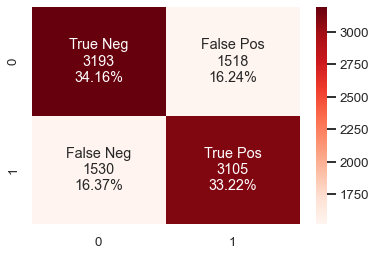

In [78]:
cf_lasso_sm = confusion_matrix(y_sm_test,n1)
conf_plot(cf_lasso_sm)

### Lasso Undersampled 

In [79]:
lasso_regression_undersampled = sm.Logit(y_us_train,add_constant(X_us_train))
lasso_results2 = lasso_regression_undersampled.fit_regularized(alpha=24,method='l1',maxiter=5000,refit=True)
lasso_results2.summary2()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6200627812527469
            Iterations: 43
            Function evaluations: 44
            Gradient evaluations: 43


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.111     
Dependent Variable: Default          AIC:              13116.3666
Date:               2022-08-22 22:23 BIC:              13239.9602
No. Observations:   10617            Log-Likelihood:   -6541.2   
Df Model:           16               LL-Null:          -7359.1   
Df Residuals:       10600            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     43.0000                                      
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.1743    0.0216  -8.0692  0.0000  -0.2166  -0.1320
LIMIT_BAL     -0.0939    0.0276  -3.3986  0.0007  -0.1480  -0.0397
SEX           -0.0499    0.0210  -2.3748  0.0176  -0.0911  -0.0087
EDUCATION     -0.0473    0.0228  -2.0803  0.0375  -0.0919  -0.0027
MARRIAGE      -0.0512    0.0229  -2.2353  0.0254  -0.0960  -0.0063
AGE            0.0668    0.0231   2.8903  0.0038   0.0215   0.1121
PAY_0          0.5733    0.0267  21.4570  0.0000   0.5209   0.6257
PAY_2          0.0945    0.0332   2.8471  0.0044   0.0294   0.1596
PAY_3          0.0969    0.0370   2.6175  0.0089   0.0243   0.1694
PAY_4          0.0177    0.0318   0.5562  0.5781  -0.0446   0.0800
PAY_6          0.0000       nan      nan     nan      nan      nan
BILL_AMT1     -0.1367    0.0255  -5.3648  0.0000  -0.1867  -0.0868
BILL_AMT6      0.0000       nan      nan     nan      nan      nan
PAY_AMT1      -0.1000    0.0356  -2.8096  0.0050  -0.1697  -0.0302
PAY_AMT2      -0.1630    0.0481  -3.3885  0.0007  -0.2573  -0.0687
PAY_AMT3      -0.0039    0.0259  -0.1517  0.8794  -0.0547   0.0468
PAY_AMT4      -0.0271    0.0301  -0.9024  0.3668  -0.0860   0.0318
PAY_AMT5      -0.0347    0.0244  -1.4240  0.1544  -0.0825   0.0131
PAY_AMT6      -0.0197    0.0258  -0.7640  0.4449  -0.0703   0.0309
=================================================================

"""

In [80]:
lasso_pred2 = lasso_results2.predict(add_constant(X_us_test))
n1=[]
for val in lasso_pred2:
    if(val>=0.5):
        n1.append(1)
    else :
        n1.append(0)
recall1_lasso=recall_score(y_us_test,n1)
f1_lasso=f1_score(y_us_test,n1)
print(classification_report(y_us_test,n1))
print("F1 Score is",f1_score(y_us_test,n1))
#cf_lasso1=confusion_matrix(y_test,n1)

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1324
           1       0.70      0.63      0.66      1331

    accuracy                           0.68      2655
   macro avg       0.68      0.68      0.68      2655
weighted avg       0.68      0.68      0.68      2655

F1 Score is 0.660347551342812


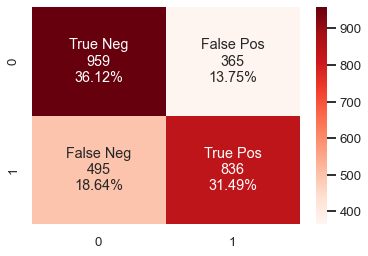

In [81]:
cf_lasso_us = confusion_matrix(y_us_test,n1)
conf_plot(cf_lasso_us)

## Conclusion :-

According to f1 score SMOTE Lasso is the best model while LASSO UNDERSAMPLED has the small f1 score as compaired to SMOTE Lasso according to our calculations.